In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score
from xgboost import XGBClassifier

In [29]:
TRAIN_DATA="data\\train.csv"
TEST_DATA="data\\test.csv"
PRED_DATA="data\\pred.csv"
TARGET="data\\target.csv"
SEED=4567

In [30]:
train_data=pd.read_csv(TRAIN_DATA)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
#Preprocessing
def preprocess(data):
    Titles =["Mr","Miss","Mrs","Master"]

    for title in Titles:
        t= title+". "
        data[title] = data["Name"].str.contains(t)

    cat_variables = ['Sex',
    'Pclass',
    'Embarked',
    ]
    # One hot encoding
    data = pd.get_dummies(data = data,
                            prefix = cat_variables,
                            columns = cat_variables)
    # Initialize the class
    scaler_linear = StandardScaler()
    # Compute the mean and standard deviation of the training set then transform it
    data[["Scaled_Fare","Scaled_Age"]] = scaler_linear.fit_transform(data[["Fare","Age"]])
    return data


,SibSp,Parch,Mr,Miss,Mrs,Master,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Scaled_Fare,Scaled_Age
792,8,2,False,True,False,False,True,False,False,False,True,False,False,True,0.751946,NaN
770,0,0,True,False,False,False,False,True,False,False,True,False,False,True,-0.457142,-0.392601
623,0,0,True,False,False,False,False,True,False,False,True,False,False,True,-0.490280,-0.599265
517,0,0,True,False,False,False,False,True,False,False,True,False,True,False,-0.162169,NaN
827,0,2,False,False,False,True,False,True,False,True,False,True,False,False,0.096646,-1.977024


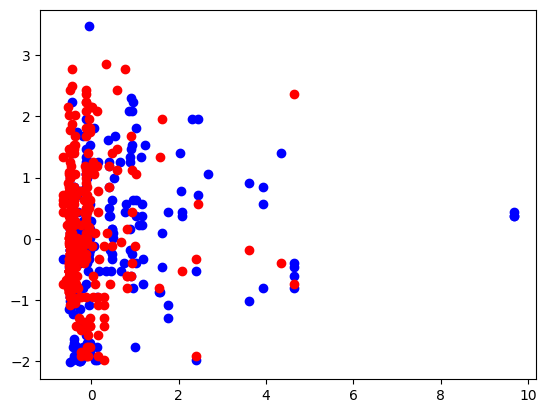

In [32]:
train_data = preprocess(train_data)
non_features = ["PassengerId","Survived","Name","Ticket","Cabin","Fare","Age"]
features = [x for x in train_data.columns if x not in non_features]
X_train,X_cv,y_train,y_cv=train_test_split(train_data[features],train_data["Survived"],train_size=0.80,random_state = SEED)
#plt.plot(range(X_train.shape[0]),X_train["Fare"].sort_values())
#plt.plot(range(X_cv.shape[0]),X_cv["Fare"].sort_values(),color="r")
#ax[i].scatter(X[Y==1,0],X[Y==1,1], s=70, marker='x', c='red', label="Good Roast" )

plt.scatter(X_train["Scaled_Fare"][y_train==1],X_train["Scaled_Age"][y_train==1],color="b",label="Survived by Age")
plt.scatter(X_train["Scaled_Fare"][y_train==0],X_train["Scaled_Age"][y_train==0],color="r",label="Dead by Age")

#plt.scatter(X_train["Scaled_Fare"][y_train==0],y_train[y_train==0],color="r",label="Dead")
#plt.scatter(X_train["Sex_female"][y_train==0],y_train[y_train==0],color="g",label="Dead women")
#plt.scatter(X_train["Sex_male"][y_train==0],y_train[y_train==0],color="y",label="Dead men")

#plt.scatter(X_cv["Scaled_Fare"],y_cv,color="y")
display(X_train.head())

In [33]:
print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_cv)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 712
validation samples: 179
target proportion: 0.3680


In [34]:
## Single Decision Tree
model = DecisionTreeClassifier(random_state = SEED).fit(X_train,y_train)
predictions_train = model.predict(X_train) ## The predicted values for the train dataset
predictions_val = model.predict(X_cv) ## The predicted values for the test dataset
accuracy_train = accuracy_score(predictions_train,y_train)
accuracy_val = accuracy_score(predictions_val,y_cv)

print (f"Training Accuracy:{accuracy_train}")
print (f"CV Accuracy:{accuracy_val}")


Training Accuracy:0.9845505617977528
CV Accuracy:0.7374301675977654


Training Accuracy:0.9747191011235955
CV Accuracy:0.8268156424581006
Training Accuracy:0.9859550561797753
CV Accuracy:0.8100558659217877
Training Accuracy:0.9859550561797753
CV Accuracy:0.8212290502793296
Training Accuracy:0.9873595505617978
CV Accuracy:0.8100558659217877


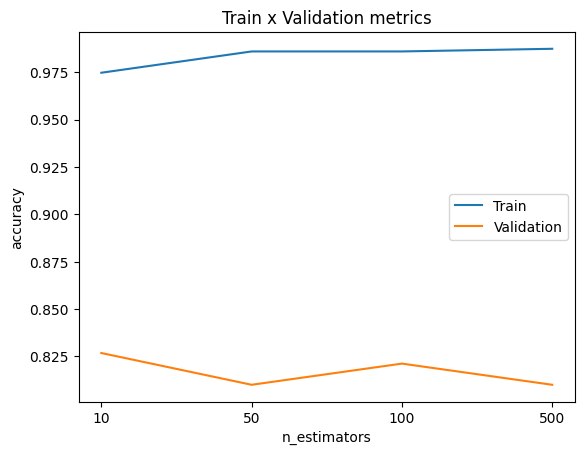

In [35]:
# Random Forest
n_estimators_list = [10,50,100,500]
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators, random_state = SEED).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_cv) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)
    print (f"Training Accuracy:{accuracy_train}")
    print (f"CV Accuracy:{accuracy_val}")

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [36]:
n_est_best=n_estimators_list[np.argmax(accuracy_list_val)]
print(n_est_best)

10


In [37]:
#XGBoost
#Find Best Learning Rate
learning_rates=[0.3,0.1,0.06,0.01,0.006,0.001]
accuracy_list_train=[]
accuracy_list_cv=[]
for l in learning_rates:

    xgb_model = XGBClassifier(n_estimators = n_est_best, learning_rate = l,early_stopping_rounds = 10,random_state = SEED,verbosity=0)
    xgb_model.fit(X_train,y_train, eval_set = [(X_cv,y_cv)])
    xgb_model.best_iteration
    yhat = xgb_model.predict(X_train)
    yhat_cv = xgb_model.predict(X_cv)
    acc_train = accuracy_score(yhat,y_train)
    acc_cv=accuracy_score(yhat_cv,y_cv)
    accuracy_list_train.append(acc_train)
    accuracy_list_cv.append(acc_cv)
    print(f"Metrics train:\n\tAccuracy score: {acc_train:.4f}")
    print(f"Metrics Val: Accuracy score: {acc_cv:.4f}")


[0]	validation_0-logloss:0.56918
[1]	validation_0-logloss:0.50770
[2]	validation_0-logloss:0.46671
[3]	validation_0-logloss:0.44418
[4]	validation_0-logloss:0.43616
[5]	validation_0-logloss:0.42932
[6]	validation_0-logloss:0.42673
[7]	validation_0-logloss:0.42803
[8]	validation_0-logloss:0.42908
[9]	validation_0-logloss:0.43092
Metrics train:
	Accuracy score: 0.9045
Metrics Val: Accuracy score: 0.8324
[0]	validation_0-logloss:0.65078
[1]	validation_0-logloss:0.61186
[2]	validation_0-logloss:0.58021
[3]	validation_0-logloss:0.55652
[4]	validation_0-logloss:0.53291
[5]	validation_0-logloss:0.51210
[6]	validation_0-logloss:0.49771
[7]	validation_0-logloss:0.48383
[8]	validation_0-logloss:0.47230
[9]	validation_0-logloss:0.46355
Metrics train:
	Accuracy score: 0.8890
Metrics Val: Accuracy score: 0.8380
[0]	validation_0-logloss:0.66967
[1]	validation_0-logloss:0.64381
[2]	validation_0-logloss:0.62079
[3]	validation_0-logloss:0.60036
[4]	validation_0-logloss:0.58214
[5]	validation_0-logloss:

Max Accuracy at 0.1, Val Accuracy: 0.8379888268156425, Train Accuracy: 0.8890449438202247


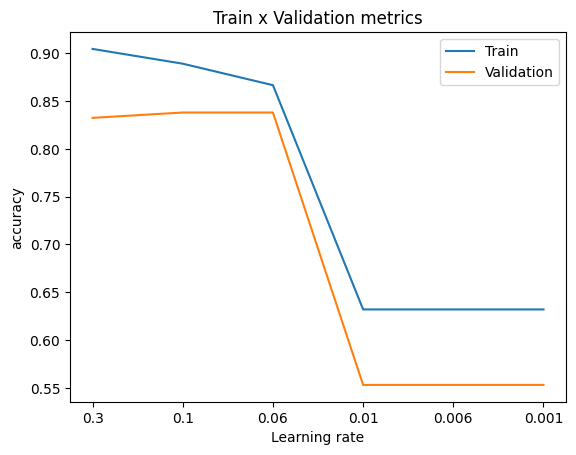

In [38]:
plt.title('Train x Validation metrics')
plt.xlabel('Learning rate')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(learning_rates )),labels=learning_rates)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_cv)
plt.legend(['Train','Validation'])
plt.show
best_index=np.argmax(accuracy_list_cv)
print(f"Max Accuracy at {learning_rates[best_index]}, Val Accuracy: {accuracy_list_cv[best_index]}, Train Accuracy: {accuracy_list_train[best_index]}")
best_learning_rate = learning_rates[best_index]

In [39]:
#XGBoost
#Find best n_est
MAX_DEPTH=8
accuracy_list_train=[]
accuracy_list_cv=[]
for n in range(1,MAX_DEPTH):

    xgb_model = XGBClassifier    (n_estimators = n_est_best, max_depth=n,learning_rate = best_learning_rate,early_stopping_rounds = 10,random_state = SEED,verbosity=0)
    xgb_model.fit(X_train,y_train, eval_set = [(X_cv,y_cv)])
    xgb_model.best_iteration
    yhat = xgb_model.predict(X_train)
    yhat_cv = xgb_model.predict(X_cv)
    acc_train = accuracy_score(yhat,y_train)
    acc_cv=accuracy_score(yhat_cv,y_cv)
    accuracy_list_train.append(acc_train)
    accuracy_list_cv.append(acc_cv)
    print(f"Metrics train:\n\tAccuracy score: {acc_train:.4f}")
    print(f"Metrics Val: Accuracy score: {acc_cv:.4f}")


[0]	validation_0-logloss:0.66942
[1]	validation_0-logloss:0.64420
[2]	validation_0-logloss:0.62453
[3]	validation_0-logloss:0.60738
[4]	validation_0-logloss:0.59418
[5]	validation_0-logloss:0.58228
[6]	validation_0-logloss:0.57332
[7]	validation_0-logloss:0.56497
[8]	validation_0-logloss:0.55574
[9]	validation_0-logloss:0.54902
Metrics train:
	Accuracy score: 0.7907
Metrics Val: Accuracy score: 0.7598
[0]	validation_0-logloss:0.66020
[1]	validation_0-logloss:0.62755
[2]	validation_0-logloss:0.59977
[3]	validation_0-logloss:0.57733
[4]	validation_0-logloss:0.55885
[5]	validation_0-logloss:0.54298
[6]	validation_0-logloss:0.52816
[7]	validation_0-logloss:0.51536
[8]	validation_0-logloss:0.50556
[9]	validation_0-logloss:0.49706
Metrics train:
	Accuracy score: 0.8118
Metrics Val: Accuracy score: 0.7709
[0]	validation_0-logloss:0.65354
[1]	validation_0-logloss:0.61731
[2]	validation_0-logloss:0.59005
[3]	validation_0-logloss:0.56459
[4]	validation_0-logloss:0.54346
[5]	validation_0-logloss:

Max Accuracy at 5, Val Accuracy: 0.8379888268156425, Train Accuracy: 0.8890449438202247


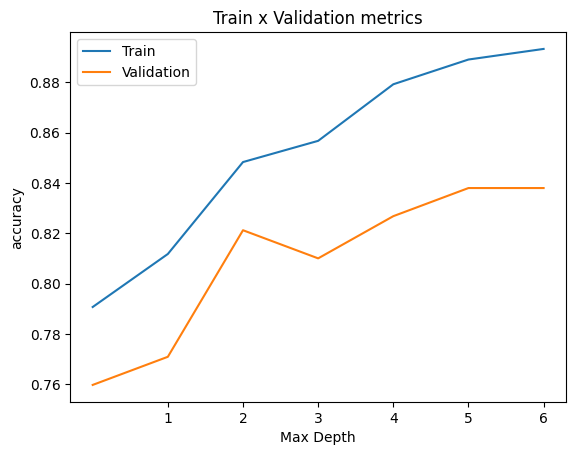

In [40]:
plt.title('Train x Validation metrics')
plt.xlabel('Max Depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(1,MAX_DEPTH),labels=range(1,MAX_DEPTH))
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_cv)
plt.legend(['Train','Validation'])
plt.show
best_index=np.argmax(accuracy_list_cv)
print(f"Max Accuracy at {best_index}, Val Accuracy: {accuracy_list_cv[best_index]}, Train Accuracy: {accuracy_list_train[best_index]}")

In [41]:
test_data=pd.read_csv(TEST_DATA)
X_test = preprocess(test_data)
display(X_test.head())
xgb_model = XGBClassifier    (n_estimators = n_est_best, max_depth=best_index,learning_rate = best_learning_rate,early_stopping_rounds = 10,random_state = SEED,verbosity=0)
xgb_model.fit(X_train[features],y_train, eval_set = [(X_cv,y_cv)])
yhat = xgb_model.predict(X_train)
yhat_cv = xgb_model.predict(X_cv)
acc_train = accuracy_score(yhat,y_train)
prec_train = precision_score(yhat,y_train)
recall_train = recall_score(yhat,y_train)

acc_cv=accuracy_score(yhat_cv,y_cv)
prec_cv=precision_score(yhat_cv,y_cv)
recall_cv=recall_score(yhat_cv,y_cv)

accuracy_list_train.append(acc_train)
accuracy_list_cv.append(acc_cv)
print(f"Metrics train: Accuracy score: {acc_train:.4f} Precision score: {prec_train:.4f} Recall score: {recall_train:.4f}")
print(f"Metrics Val: Accuracy score: {acc_cv:.4f} Precision score: {prec_cv:.4f} Recall score: {recall_cv:.4f}")

yhat_test = xgb_model.predict(X_test[features])

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Mr,Miss,...,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Scaled_Fare,Scaled_Age
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,True,False,...,False,True,False,False,True,False,True,False,-0.497811,0.298549
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,False,False,...,True,False,False,False,True,False,False,True,-0.512660,1.181328
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,True,False,...,False,True,False,True,False,False,True,False,-0.464532,2.240662
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,True,False,...,False,True,False,False,True,False,False,True,-0.482888,-0.231118
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,False,False,...,True,False,False,False,True,False,False,True,-0.417971,-0.584229


[0]	validation_0-logloss:0.65153
[1]	validation_0-logloss:0.61424
[2]	validation_0-logloss:0.58507
[3]	validation_0-logloss:0.55669
[4]	validation_0-logloss:0.53316
[5]	validation_0-logloss:0.51559
[6]	validation_0-logloss:0.49903
[7]	validation_0-logloss:0.48731
[8]	validation_0-logloss:0.47452
[9]	validation_0-logloss:0.46695
Metrics train: Accuracy score: 0.8792 Precision score: 0.7405 Recall score: 0.9151
Metrics Val: Accuracy score: 0.8268 Precision score: 0.6750 Recall score: 0.9153


In [42]:
display(test_data.head())
test_data["Survived_pred"]=yhat_test
test_data.head(20)
target_data=pd.read_csv(TARGET)
display(target_data.head())
tmp_acc = pd.merge(test_data, target_data, how="right", on='PassengerId')
tmp_acc.head()
acc_test=accuracy_score(tmp_acc["Survived_pred"],tmp_acc["Survived"])
print(f"Test Accuracy score: {acc_test:.4f}")
test_data.to_csv(PRED_DATA,columns=["PassengerId","Survived_pred"],index=False)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mr,Miss,Mrs,Master
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,True,False,False,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,False,False,True,False
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,True,False,False,False
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,True,False,False,False
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,False,False,True,False


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


Test Accuracy score: 0.8761
